In [196]:
# Dependencies and Setup
import hvplot.pandas
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
import requests

import folium
from folium import plugins
from folium.plugins import HeatMap

import branca.colormap
from collections import defaultdict
import webbrowser



In [197]:
# Load the CSV file into a DataFrame
crashes_df = pd.read_csv("data/nyc_mv_crash_data_truncated4.csv")

# Display sample data
crashes_df

,CRASH DATE,CRASH TIME,BOROUGH,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,9/11/2021,2:39,NaN,NaN,NaN,2.0,0.0,Sedan,Sedan,NaN,NaN,NaN
1,3/26/2022,11:45,NaN,NaN,NaN,1.0,0.0,Sedan,NaN,NaN,NaN,NaN
2,6/29/2022,6:55,NaN,NaN,NaN,0.0,0.0,Sedan,Pick-up Truck,NaN,NaN,NaN
3,9/11/2021,9:35,BROOKLYN,40.667202,-73.866500,0.0,0.0,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,40.683304,-73.917274,0.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,9/8/2016,14:00,BRONX,40.820297,-73.854645,0.0,0.0,Sedan,Sedan,NaN,NaN,NaN
1048571,8/23/2016,16:55,NaN,40.692722,-73.968750,0.0,0.0,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
1048572,9/11/2016,14:45,NaN,40.733430,-73.868890,0.0,0.0,Sedan,Sedan,NaN,NaN,NaN
1048573,9/9/2016,17:00,NaN,40.770065,-73.959274,0.0,0.0,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN


In [198]:
# Data cleaning - removing blanks for reports that were not filled in correctly.

cols_to_check = ['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'LATITUDE', 'LONGITUDE', 'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED', 'VEHICLE TYPE CODE 1']

crashes_df.dropna(subset=cols_to_check, inplace=True)

crashes_df

,CRASH DATE,CRASH TIME,BOROUGH,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
3,9/11/2021,9:35,BROOKLYN,40.667202,-73.866500,0.0,0.0,Sedan,NaN,NaN,NaN,NaN
7,12/14/2021,8:17,BRONX,40.868160,-73.831480,2.0,0.0,Sedan,Sedan,NaN,NaN,NaN
8,12/14/2021,21:10,BROOKLYN,40.671720,-73.897100,0.0,0.0,Sedan,NaN,NaN,NaN,NaN
9,12/14/2021,14:58,MANHATTAN,40.751440,-73.973970,0.0,0.0,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
11,12/14/2021,16:50,QUEENS,40.675884,-73.755770,0.0,0.0,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1048563,9/10/2016,18:39,MANHATTAN,40.746490,-74.001335,0.0,0.0,Station Wagon/Sport Utility Vehicle,Sedan,Sedan,NaN,NaN
1048564,8/22/2016,15:30,QUEENS,40.665504,-73.856120,0.0,0.0,Convertible,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
1048566,8/29/2016,13:45,QUEENS,40.686516,-73.846540,0.0,0.0,Sedan,NaN,NaN,NaN,NaN
1048568,9/10/2016,11:00,QUEENS,40.680490,-73.774704,1.0,0.0,Station Wagon/Sport Utility Vehicle,Bike,NaN,NaN,NaN


In [199]:
# Count up the number of vehicles involved in each incident
crashes_df['NUMBER OF VEHICLES'] = crashes_df[['VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5']].count(axis=1)

In [200]:
# New dataframe seperating normal crashes from major (fatal)
fatality_df = crashes_df[crashes_df['NUMBER OF PERSONS KILLED']>0]

fatality_df

,CRASH DATE,CRASH TIME,BOROUGH,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,NUMBER OF VEHICLES
591,4/15/2021,15:18,BROOKLYN,40.620487,-74.029305,0.0,1.0,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN,1
1350,7/8/2021,22:03,MANHATTAN,40.721474,-73.983830,0.0,1.0,Sedan,Bike,NaN,NaN,NaN,2
2346,8/27/2021,9:15,MANHATTAN,40.805740,-73.942764,1.0,1.0,Sedan,NaN,NaN,NaN,NaN,1
2437,9/11/2021,18:18,BROOKLYN,40.684204,-73.968060,3.0,1.0,Sedan,Sedan,NaN,NaN,NaN,2
2607,4/8/2021,19:55,BRONX,40.830307,-73.898730,0.0,1.0,E-Bike,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1031260,10/7/2016,14:47,MANHATTAN,0.000000,0.000000,0.0,1.0,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN,1
1032436,10/4/2016,9:49,MANHATTAN,40.719933,-73.978760,0.0,1.0,Bus,NaN,NaN,NaN,NaN,1
1035830,9/30/2016,12:16,STATEN ISLAND,40.626663,-74.075650,0.0,1.0,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN,1
1037943,9/13/2016,19:41,MANHATTAN,40.810684,-73.954520,0.0,1.0,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN,1


In [201]:
# Brooklyn Borough only dataframe for mapping
brooklyn_df = crashes_df[crashes_df['BOROUGH'] == 'BROOKLYN']
brooklyn_ftl_df = fatality_df[fatality_df['BOROUGH'] == 'BROOKLYN']

print(len(brooklyn_df))
print(len(brooklyn_ftl_df))

211660
247


In [202]:
# Bronx Borough only dataframe for mapping
bronx_df = crashes_df[crashes_df['BOROUGH'] == 'BRONX']
bronx_ftl_df = fatality_df[fatality_df['BOROUGH'] == 'BRONX']

print(len(bronx_df))
print(len(bronx_ftl_df))


104534
113


In [203]:
# Manhattan Borough only dataframe for mapping
manhattan_df = crashes_df[crashes_df['BOROUGH'] == 'MANHATTAN']
manhattan_ftl_df = fatality_df[fatality_df['BOROUGH'] == 'MANHATTAN']

print(len(manhattan_df))
print(len(manhattan_ftl_df))

124864
129


In [204]:
# Staten Island Borough only dataframe for mapping
staten_df = crashes_df[crashes_df['BOROUGH'] == 'STATEN ISLAND']
staten_ftl_df = fatality_df[fatality_df['BOROUGH'] == 'STATEN ISLAND']

print(len(staten_df))
print(len(staten_ftl_df))

24164
37


In [205]:
# Queens Borough only dataframe for mapping
queens_df = crashes_df[crashes_df['BOROUGH'] == 'QUEENS']
queens_ftl_df = fatality_df[fatality_df['BOROUGH'] == 'QUEENS']

print(len(queens_df))
print(len(queens_ftl_df))

180261
210


In [206]:
#API CALL SECTION - GRABS THE US CENSUS DATA FOR THE TOTAL POPULATION FOR EACH BOROUGH

#https://www.census.gov/data/developers/data-sets.html#:~:text=The%20Census%20Bureau's%20Application%20Programming,users%20to%20create%20custom%20queries.
#https://www.census.gov/data/developers/data-sets/popest-popproj/popest.html
#https://api.census.gov/data/2021/pep/population/variables.html


base_url = 'https://api.census.gov/data/2019/pep/population'
get_param = 'POP,NAME'
for_param = 'for=county:*'
in_param = 'in=state:36'
key_param = '7c96416b422b964d28c1c72ecbaef6395f6369dc'  # Census key I made for the project - NOT SECURE

# Send API request
url = f'{base_url}?get={get_param}&{for_param}&{in_param}&key={key_param}'
response = requests.get(url)
data = response.json()

#https://api.census.gov/data/2019/pep/population?get=POP,NAME&for=county:*&in=state:36&key=7c96416b422b964d28c1c72ecbaef6395f6369dc

# Create a dataframe from the API response
columns = data[0]
values = data[1:]
population_df = pd.DataFrame(values, columns=columns)

#https://portal.311.nyc.gov/article/?kanumber=KA-02877  list of all counties and their respective Borough name
#need to convert official county name into the commonly known names

# Generate list of the counties / boroughs that I need from the API JSON data and then only store those 5 
county_names = ['Bronx County, New York', 'Kings County, New York', 'New York County, New York', 'Queens County, New York', 'Richmond County, New York']
county_population_df = population_df[population_df['NAME'].isin(county_names)].copy()
county_population_df['Population'] = county_population_df['POP'].astype(int)

# Rename them to their more commonly known slang terms
new_mapping={
    'Bronx County, New York':'Bronx', 
    'Kings County, New York':'Brooklyn', 
    'New York County, New York':'Manhattan', 
    'Queens County, New York':'Queens', 
    'Richmond County, New York':'Staten Island'
}

county_population_df['NAME'] = county_population_df['NAME'].replace(new_mapping)

# Store only the data we need - Name and Population

county_pop_df = county_population_df[['NAME', 'Population']]

county_pop_df = county_pop_df.sort_values('NAME')

# Display API pulled census dataframe
county_pop_df


,NAME,Population
29,Bronx,1418207
33,Brooklyn,2559903
12,Manhattan,1628706
7,Queens,2253858
42,Staten Island,476143


In [207]:
############################################################################################################################################
############################################################################################################################################
# QUESTION 1: STEVE
# Can we use the data to find focus areas that are more likely to have major accidents?  
# Does each borough or all of NYC have specific areas that are more likely to have major accidents?
############################################################################################################################################
############################################################################################################################################

In [208]:
%%capture --no-display

# Total Crashes Map - All Boroughs - All Crashes

map_plot = crashes_df.hvplot.points(
    "LONGITUDE",
    "LATITUDE",
    geo = True,
    hover_cols=['LATITUDE', 'LONGITUDE', 'BOROUGH'],
    tiles = "OSM",
    frame_width = 800,
    frame_height = 600,
    title = "All Crashes Map - All Boroughs",
    scale = 0.5,
    xlim = (-74.2, -73.5),
    ylim = (40.5, 41),
    color = "BOROUGH"
)
# Export the map
hvplot.save(map_plot, 'all_crashes.html')

# Displaying over 600,000 dots causes system lag
#map_plot

In [209]:
%%capture --no-display

# Fatal Crashes Map - All Boroughs - Only Fatal Crashes


map_plot = fatality_df.hvplot.points(
    "LONGITUDE",
    "LATITUDE",
    geo = True,
    hover_cols=['LATITUDE', 'LONGITUDE', 'BOROUGH'],
    tiles = "OSM",
    title = "Fatal Crashes Map - All Boroughs",
    frame_width = 1000,
    frame_height = 800,
    scale = 0.5,
    xlim = (-74.2, -73.5),
    ylim = (40.5, 41),
    color = "BOROUGH"
)
# Export the map
hvplot.save(map_plot, 'fatal_crashes.html')

# Display the map
map_plot

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [LONGITUDE,LATITUDE]   (BOROUGH)

In [210]:
# All Crashes Heat Map - All Boroughs

nyc_coords = (40.7128, -74.0060)
loc = 'All Crashes Heat Map - All Boroughs'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc)   

f = folium.Figure(width=1200, height=800)
f.get_root().html.add_child(folium.Element(title_html))
crash_map = folium.Map(location= nyc_coords, tiles="openstreetmap", zoom_start=11).add_to(f)
heat_data = [[row['LATITUDE'], row['LONGITUDE']] for index, row in crashes_df.iterrows()]
HeatMap(heat_data).add_to(crash_map)

# Display the map
crash_map.save('heatmaps/NYC_heatmap.html')

#Just like before there are so many crashes in this data it needs narrowed down to be able to visualize as a map.
#crash_map

In [211]:
# Fatal Crashes Heat Map - All Boroughs

nyc_coords = (40.7128, -74.0060)
loc = 'Fatal Crashes Heat Map - All Boroughs | Scale: Yellow - least to zero | Red - Most crashes'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc)   

f = folium.Figure(width=1200, height=800)
f.get_root().html.add_child(folium.Element(title_html))

crash_map = folium.Map(location= nyc_coords, tiles="openstreetmap", zoom_start=11).add_to(f)
heat_data = [[row['LATITUDE'], row['LONGITUDE']] for index, row in fatality_df.iterrows()]

#gradient documentation here: https://python-visualization.github.io/branca/colormap.html#branca.colormap.LinearColormap
#https://stackoverflow.com/questions/47163728/how-to-add-legend-gradient-in-folium-heat-map
steps = 20
colormap = branca.colormap.linear.YlOrRd_09.scale(0, 1).to_step(steps)

gradient_map=defaultdict(dict)

for i in range(steps):
    gradient_map[1/steps*i] = colormap.rgb_hex_str(1/steps*i)
    
colormap.add_to(crash_map) #add color bar at the top of the map


HeatMap(heat_data, gradient=gradient_map).add_to(crash_map)

# Display and Export the map
crash_map.save('heatmaps/NYC_Fatal_heatmap.html')
crash_map

In [212]:
# All Crashes Heat Map - Only Brooklyn Borough
nyc_coords = (40.67,-73.94)
loc = 'All Crashes Heat Map - Only Brooklyn Borough | Scale: Yellow - least to zero | Red - Most crashes'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc)   

f = folium.Figure(width=1200, height=800)
f.get_root().html.add_child(folium.Element(title_html))
crash_map = folium.Map(location=nyc_coords, tiles="openstreetmap", zoom_start=12).add_to(f)
heat_data = [[row['LATITUDE'], row['LONGITUDE']] for index, row in brooklyn_df.iterrows()]

#gradient documentation here: https://python-visualization.github.io/branca/colormap.html#branca.colormap.LinearColormap
#https://stackoverflow.com/questions/47163728/how-to-add-legend-gradient-in-folium-heat-map
steps = 20
colormap = branca.colormap.linear.YlOrRd_09.scale(0, 1).to_step(steps)

gradient_map=defaultdict(dict)

for i in range(steps):
    gradient_map[1/steps*i] = colormap.rgb_hex_str(1/steps*i)
    
colormap.add_to(crash_map) #add color bar at the top of the map


HeatMap(heat_data, gradient=gradient_map).add_to(crash_map)

# Display and Export the map
crash_map.save('heatmaps/Brooklyn_heatmap.html')
#crash_map

In [213]:
# Fatal Crashes Heat Map - Only Brooklyn Borough
nyc_coords = (40.67,-73.94)
loc = 'Fatal Crashes Heat Map - Only Brooklyn Borough | Scale: Yellow - least to zero | Red - Most crashes'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc)   

f = folium.Figure(width=1200, height=800)
f.get_root().html.add_child(folium.Element(title_html))
crash_map = folium.Map(location=nyc_coords, tiles="openstreetmap", zoom_start=12).add_to(f)
heat_data = [[row['LATITUDE'], row['LONGITUDE']] for index, row in brooklyn_ftl_df.iterrows()]

#gradient documentation here: https://python-visualization.github.io/branca/colormap.html#branca.colormap.LinearColormap
#https://stackoverflow.com/questions/47163728/how-to-add-legend-gradient-in-folium-heat-map
steps = 20
colormap = branca.colormap.linear.YlOrRd_09.scale(0, 1).to_step(steps)

gradient_map=defaultdict(dict)

for i in range(steps):
    gradient_map[1/steps*i] = colormap.rgb_hex_str(1/steps*i)
    
colormap.add_to(crash_map) #add color bar at the top of the map


HeatMap(heat_data, gradient=gradient_map).add_to(crash_map)

# Display and Export the map
crash_map.save('heatmaps/Brooklyn_Fatal_heatmap.html')
crash_map

In [214]:
# All Crashes Heat Map - Only Bronx Borough
nyc_coords = (40.84,-73.86)
loc = 'All Crashes Heat Map - Only Bronx Borough | Scale: Yellow - least to zero | Red - Most crashes'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc)   

f = folium.Figure(width=1200, height=800)
f.get_root().html.add_child(folium.Element(title_html))
crash_map = folium.Map(location= nyc_coords, tiles="openstreetmap", zoom_start=13).add_to(f)
heat_data = [[row['LATITUDE'], row['LONGITUDE']] for index, row in bronx_df.iterrows()]

#gradient documentation here: https://python-visualization.github.io/branca/colormap.html#branca.colormap.LinearColormap
#https://stackoverflow.com/questions/47163728/how-to-add-legend-gradient-in-folium-heat-map
steps = 20
colormap = branca.colormap.linear.YlOrRd_09.scale(0, 1).to_step(steps)

gradient_map=defaultdict(dict)

for i in range(steps):
    gradient_map[1/steps*i] = colormap.rgb_hex_str(1/steps*i)
    
colormap.add_to(crash_map) #add color bar at the top of the map


HeatMap(heat_data, gradient=gradient_map).add_to(crash_map)

# Display and Export the map
crash_map.save('heatmaps/Bronx_heatmap.html')
#crash_map

In [215]:
# Fatal Crashes Heat Map - Only Bronx Borough
nyc_coords = (40.84,-73.86)
loc = 'Fatal Crashes Heat Map - Only Bronx Borough | Scale: Yellow - least to zero | Red - Most crashes'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc)   

f = folium.Figure(width=1200, height=800)
f.get_root().html.add_child(folium.Element(title_html))
crash_map = folium.Map(location= nyc_coords, tiles="openstreetmap", zoom_start=13).add_to(f)
heat_data = [[row['LATITUDE'], row['LONGITUDE']] for index, row in bronx_ftl_df.iterrows()]

#gradient documentation here: https://python-visualization.github.io/branca/colormap.html#branca.colormap.LinearColormap
#https://stackoverflow.com/questions/47163728/how-to-add-legend-gradient-in-folium-heat-map
steps = 20
colormap = branca.colormap.linear.YlOrRd_09.scale(0, 1).to_step(steps)

gradient_map=defaultdict(dict)

for i in range(steps):
    gradient_map[1/steps*i] = colormap.rgb_hex_str(1/steps*i)
    
colormap.add_to(crash_map) #add color bar at the top of the map


HeatMap(heat_data, gradient=gradient_map).add_to(crash_map)

# Display and Export the map
crash_map.save('heatmaps/Bronx_Fatal_heatmap.html')
crash_map

In [216]:
# All Crashes Heat Map - Only Manhattan Borough
nyc_coords = (40.77, -73.97)
loc = 'All Crashes Heat Map - Only Manhattan Borough | Scale: Yellow - least to zero | Red - Most crashes'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc)   

f = folium.Figure(width=1200, height=800)
f.get_root().html.add_child(folium.Element(title_html))
crash_map = folium.Map(location= nyc_coords, tiles="openstreetmap", zoom_start=12).add_to(f)
heat_data = [[row['LATITUDE'], row['LONGITUDE']] for index, row in manhattan_df.iterrows()]

#gradient documentation here: https://python-visualization.github.io/branca/colormap.html#branca.colormap.LinearColormap
#https://stackoverflow.com/questions/47163728/how-to-add-legend-gradient-in-folium-heat-map
steps = 20
colormap = branca.colormap.linear.YlOrRd_09.scale(0, 1).to_step(steps)

gradient_map=defaultdict(dict)

for i in range(steps):
    gradient_map[1/steps*i] = colormap.rgb_hex_str(1/steps*i)
    
colormap.add_to(crash_map) #add color bar at the top of the map


HeatMap(heat_data, gradient=gradient_map).add_to(crash_map)

# Display and Export the map
crash_map.save('heatmaps/Manhattan_heatmap.html')
#crash_map

In [217]:
# Fatal Crashes Heat Map - Only Manhattan Borough
nyc_coords = (40.77, -73.97)
loc = 'Fatal Crashes Heat Map - Only Manhattan Borough | Scale: Yellow - least to zero | Red - Most crashes'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc)   

f = folium.Figure(width=1200, height=800)
f.get_root().html.add_child(folium.Element(title_html))
crash_map = folium.Map(location= nyc_coords, tiles="openstreetmap", zoom_start=12).add_to(f)
heat_data = [[row['LATITUDE'], row['LONGITUDE']] for index, row in manhattan_ftl_df.iterrows()]

#gradient documentation here: https://python-visualization.github.io/branca/colormap.html#branca.colormap.LinearColormap
#https://stackoverflow.com/questions/47163728/how-to-add-legend-gradient-in-folium-heat-map
steps = 20
colormap = branca.colormap.linear.YlOrRd_09.scale(0, 1).to_step(steps)

gradient_map=defaultdict(dict)

for i in range(steps):
    gradient_map[1/steps*i] = colormap.rgb_hex_str(1/steps*i)
    
colormap.add_to(crash_map) #add color bar at the top of the map


HeatMap(heat_data, gradient=gradient_map).add_to(crash_map)

# Display and Export the map
crash_map.save('heatmaps/Manhattan_Fatal_heatmap.html')
crash_map

In [218]:
# All Crashes Heat Map - Only Queens Borough
nyc_coords = (40.713, -73.813)
loc = 'All Crashes Heat Map - Only Queens Borough | Scale: Yellow - least to zero | Red - Most crashes'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc)   

f = folium.Figure(width=1200, height=800)
f.get_root().html.add_child(folium.Element(title_html))
crash_map = folium.Map(location= nyc_coords, tiles="openstreetmap", zoom_start=12).add_to(f)
heat_data = [[row['LATITUDE'], row['LONGITUDE']] for index, row in queens_df.iterrows()]

#gradient documentation here: https://python-visualization.github.io/branca/colormap.html#branca.colormap.LinearColormap
#https://stackoverflow.com/questions/47163728/how-to-add-legend-gradient-in-folium-heat-map
steps = 20
colormap = branca.colormap.linear.YlOrRd_09.scale(0, 1).to_step(steps)

gradient_map=defaultdict(dict)

for i in range(steps):
    gradient_map[1/steps*i] = colormap.rgb_hex_str(1/steps*i)
    
colormap.add_to(crash_map) #add color bar at the top of the map


HeatMap(heat_data, gradient=gradient_map).add_to(crash_map)

# Display and Export the map
crash_map.save('heatmaps/Queens_heatmap.html')
#crash_map

In [219]:
# Fatal Crashes Heat Map - Only Queens Borough
nyc_coords = (40.713, -73.813)
loc = 'Fatal Crashes Heat Map - Only Queens Borough | Scale: Yellow - least to zero | Red - Most crashes'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc)   

f = folium.Figure(width=1200, height=800)
f.get_root().html.add_child(folium.Element(title_html))
crash_map = folium.Map(location= nyc_coords, tiles="openstreetmap", zoom_start=12).add_to(f)
heat_data = [[row['LATITUDE'], row['LONGITUDE']] for index, row in queens_ftl_df.iterrows()]

#gradient documentation here: https://python-visualization.github.io/branca/colormap.html#branca.colormap.LinearColormap
#https://stackoverflow.com/questions/47163728/how-to-add-legend-gradient-in-folium-heat-map
steps = 20
colormap = branca.colormap.linear.YlOrRd_09.scale(0, 1).to_step(steps)

gradient_map=defaultdict(dict)

for i in range(steps):
    gradient_map[1/steps*i] = colormap.rgb_hex_str(1/steps*i)
    
colormap.add_to(crash_map) #add color bar at the top of the map


HeatMap(heat_data, gradient=gradient_map).add_to(crash_map)

# Display and Export the map
crash_map.save('heatmaps/Queens_Fatal_heatmap.html')
crash_map

In [220]:
# All Crashes Heat Map - Only Staten Island Borough
loc = 'All  Crashes Heat Map - Only Staten Island Borough | Scale: Yellow - least to zero | Red - Most crashes'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc)   

nyc_coords = (40.570, -74.1358)
f = folium.Figure(width=1200, height=800)
f.get_root().html.add_child(folium.Element(title_html))
crash_map = folium.Map(location= nyc_coords, tiles="openstreetmap", zoom_start=12).add_to(f)
heat_data = [[row['LATITUDE'], row['LONGITUDE']] for index, row in staten_df.iterrows()]

#gradient documentation here: https://python-visualization.github.io/branca/colormap.html#branca.colormap.LinearColormap
#https://stackoverflow.com/questions/47163728/how-to-add-legend-gradient-in-folium-heat-map
steps = 20
colormap = branca.colormap.linear.YlOrRd_09.scale(0, 1).to_step(steps)

gradient_map=defaultdict(dict)

for i in range(steps):
    gradient_map[1/steps*i] = colormap.rgb_hex_str(1/steps*i)
    
colormap.add_to(crash_map) #add color bar at the top of the map


HeatMap(heat_data, gradient=gradient_map).add_to(crash_map)

# Display and Export the map
crash_map.save('heatmaps/StatenIsland_heatmap.html')
#crash_map

In [221]:
# Fatal Crashes Heat Map - Only Staten Island Borough
loc = 'Fatal Crashes Heat Map - Only Staten Island Borough | Scale: Yellow - least to zero | Red - Most crashes'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc)   

nyc_coords = (40.570, -74.1358)
f = folium.Figure(width=1200, height=800)
f.get_root().html.add_child(folium.Element(title_html))

crash_map = folium.Map(location= nyc_coords, tiles="openstreetmap", zoom_start=12).add_to(f)
heat_data = [[row['LATITUDE'], row['LONGITUDE']] for index, row in staten_ftl_df.iterrows()]

#gradient documentation here: https://python-visualization.github.io/branca/colormap.html#branca.colormap.LinearColormap
#https://stackoverflow.com/questions/47163728/how-to-add-legend-gradient-in-folium-heat-map
steps = 20
colormap = branca.colormap.linear.YlOrRd_09.scale(0, 1).to_step(steps)

gradient_map=defaultdict(dict)

for i in range(steps):
    gradient_map[1/steps*i] = colormap.rgb_hex_str(1/steps*i)
    
colormap.add_to(crash_map) #add color bar at the top of the map


HeatMap(heat_data, gradient=gradient_map).add_to(crash_map)

# Display and Export the map
crash_map.save('heatmaps/StatenIsland_Fatal_heatmap.html')
crash_map

In [222]:
#Looking at all crashes - build a summary statistics table

agg_summary_stats = crashes_df.groupby("BOROUGH").agg({"NUMBER OF PERSONS KILLED":["min", "max", "mean","median","var","std","sem"]})
agg_summary_stats["Total"] = crashes_df.groupby('BOROUGH').size().values
agg_summary_stats

NUMBER OF PERSONS KILLED                                  \
                                   min  max      mean median       var   
BOROUGH                                                                  
BRONX                              0.0  2.0  0.001100    0.0  0.001137   
BROOKLYN                           0.0  3.0  0.001191    0.0  0.001246   
MANHATTAN                          0.0  8.0  0.001105    0.0  0.001585   
QUEENS                             0.0  4.0  0.001226    0.0  0.001391   
STATEN ISLAND                      0.0  3.0  0.001614    0.0  0.001860   

                                    Total  
                    std       sem          
BOROUGH                                    
BRONX          0.033722  0.000104  104534  
BROOKLYN       0.035297  0.000077  211660  
MANHATTAN      0.039806  0.000113  124864  
QUEENS         0.037295  0.000088  180261  
STATEN ISLAND  0.043125  0.000277   24164

In [223]:
#Looking at ONLY crashes with fatalities - build a summary statistics table

ftl_agg_summary_stats = fatality_df.groupby("BOROUGH").agg({"NUMBER OF PERSONS KILLED":["min", "max", "mean","median","var","std","sem"]})
ftl_agg_summary_stats["Total"] = fatality_df.groupby('BOROUGH').size().values
ftl_agg_summary_stats

NUMBER OF PERSONS KILLED                                  \
                                   min  max      mean median       var   
BOROUGH                                                                  
BRONX                              1.0  2.0  1.017699    1.0  0.017541   
BROOKLYN                           1.0  3.0  1.020243    1.0  0.028044   
MANHATTAN                          1.0  8.0  1.069767    1.0  0.393532   
QUEENS                             1.0  4.0  1.052381    1.0  0.088152   
STATEN ISLAND                      1.0  3.0  1.054054    1.0  0.108108   

                                  Total  
                    std       sem        
BOROUGH                                  
BRONX          0.132443  0.012459   113  
BROOKLYN       0.167463  0.010655   247  
MANHATTAN      0.627321  0.055233   129  
QUEENS         0.296904  0.020488   210  
STATEN ISLAND  0.328798  0.054054    37

In [224]:
# When visualizing the maps as a whole it was clear that Staten Island had less accidents than the other boroughs. This is likely due to less population. 
# However when you individually display each NYC Borough we saw that every borough had their own danger zones that are more likely to have major accidents.
# This is indication  that these areas may need further study for safety concerns.


# Possible Solutions:
# To improve  areas where there are dark red hotspots we could potentially do the following:
# Add more police presence, add speed cameras, adjust speed limits.
# In addition we could verify if traffic signs are visible, functional, or check if they need to be added to troubled intersections.

In [225]:
############################################################################################################################################
############################################################################################################################################
# QUESTION 2: STEVE
# Has there been an increase in crashes over time?  Did COVID have any effect on the number of crashes?
############################################################################################################################################
############################################################################################################################################

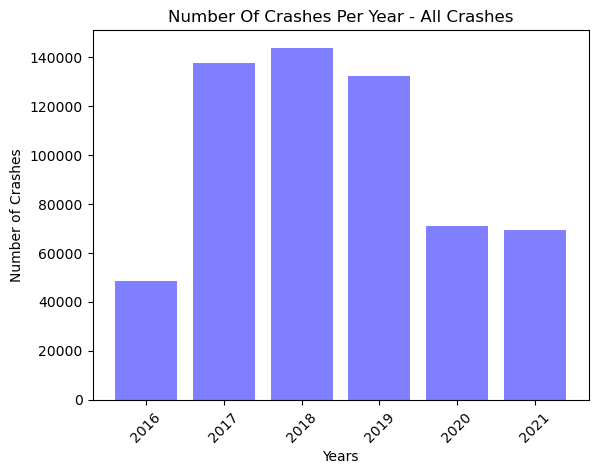

In [226]:
crashes_df['YEAR'] = pd.DatetimeIndex(crashes_df['CRASH DATE']).year

years = [2016,2017,2018,2019,2020,2021]
totalperyear = []

y2016 = crashes_df[crashes_df['YEAR'] == 2016]
y2017 = crashes_df[crashes_df['YEAR'] == 2017]
y2018 = crashes_df[crashes_df['YEAR'] == 2018]
y2019 = crashes_df[crashes_df['YEAR'] == 2019]
y2020 = crashes_df[crashes_df['YEAR'] == 2020]
y2021 = crashes_df[crashes_df['YEAR'] == 2021]

totalperyear.append(len(y2016))
totalperyear.append(len(y2017))
totalperyear.append(len(y2018))
totalperyear.append(len(y2019))
totalperyear.append(len(y2020))
totalperyear.append(len(y2021))

x_axis = years
y_axis = totalperyear
plt.bar(x_axis, y_axis, color='b', alpha=0.5, align="center")
plt.xticks(rotation = 45)
plt.title("Number Of Crashes Per Year - All Crashes")
plt.xlabel("Years")
plt.ylabel("Number of Crashes")
plt.show()


# The introduction of COVID19 definitely had a drastic impact on the number of accidents as you would expect.  
# More people were staying home, working from home, not travelling for leisure or pleasure.  


C:\Users\sbenn\AppData\Local\Temp\ipykernel_15640\3179823060.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fatality_df['YEAR'] = pd.DatetimeIndex(fatality_df['CRASH DATE']).year


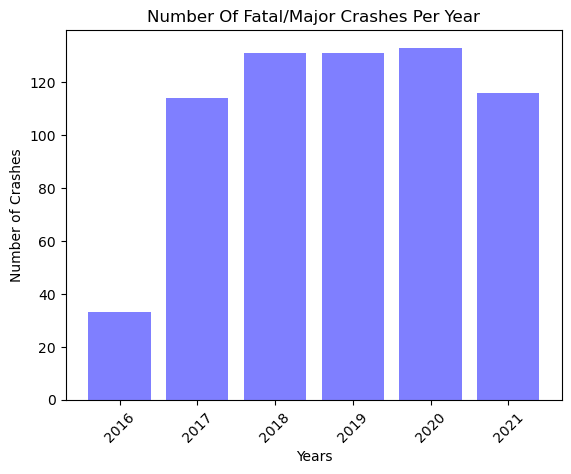

In [227]:
fatality_df['YEAR'] = pd.DatetimeIndex(fatality_df['CRASH DATE']).year

years = [2016,2017,2018,2019,2020,2021]
totalperyear = []

y2016 = fatality_df[fatality_df['YEAR'] == 2016]
y2017 = fatality_df[fatality_df['YEAR'] == 2017]
y2018 = fatality_df[fatality_df['YEAR'] == 2018]
y2019 = fatality_df[fatality_df['YEAR'] == 2019]
y2020 = fatality_df[fatality_df['YEAR'] == 2020]
y2021 = fatality_df[fatality_df['YEAR'] == 2021]

totalperyear.append(len(y2016))
totalperyear.append(len(y2017))
totalperyear.append(len(y2018))
totalperyear.append(len(y2019))
totalperyear.append(len(y2020))
totalperyear.append(len(y2021))

x_axis = years
y_axis = totalperyear
plt.bar(x_axis, y_axis, color='b', alpha=0.5, align="center")
plt.xticks(rotation = 45)
plt.title("Number Of Fatal/Major Crashes Per Year")
plt.xlabel("Years")
plt.ylabel("Number of Crashes")
plt.show()

# This was a very surprising result - there was an actual increase of major/fatal accidents in 2020 and then again in 2021 nearly matched 2017.
# More people were staying home, working from home, not travelling for leisure or pleasure - yet we did not have the drop in major incidents. 

In [228]:
# Further study into who was more likely driving during covid compared to pre-covid would be very interesting to see.  
# Are professional drivers / delivery / truckers a larger cause of major/fatal accidents?
# Were people more reckless during covid?
# 
# This unfortunately created many more questions than answers with the limited set of data that we had.

In [229]:
############################################################################################################################################
############################################################################################################################################
# QUESTION 3: STEVE
# During normal work commute times - is there a differnce in the number of crashes before or after a workday is completed?
############################################################################################################################################
############################################################################################################################################

In [230]:
crashes_df['CRASH TIME'] = pd.to_datetime(crashes_df['CRASH TIME'])

morning_rh_df = crashes_df[(crashes_df['CRASH TIME'].dt.hour >= 5) & (crashes_df['CRASH TIME'].dt.hour < 9)]
afternoon_rh_df = crashes_df[(crashes_df['CRASH TIME'].dt.hour >= 15) & (crashes_df['CRASH TIME'].dt.hour < 19)]

borough_counts1 = morning_rh_df['BOROUGH'].value_counts().sort_index()
borough_counts2 = afternoon_rh_df['BOROUGH'].value_counts().sort_index()

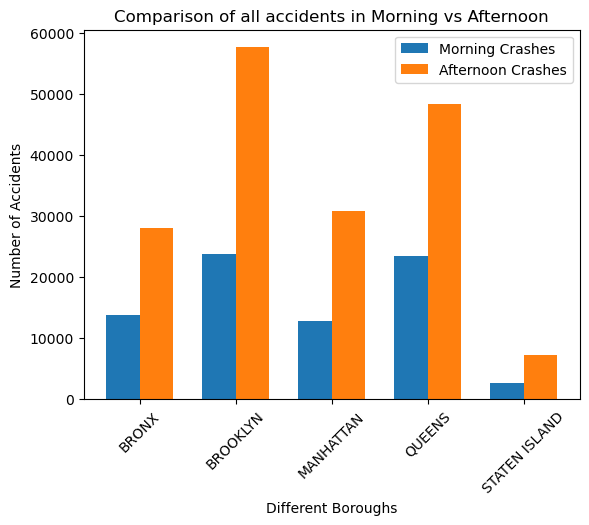

In [231]:
bar_width = 0.35

x1 = np.arange(len(borough_counts1))
x2 = [x + bar_width for x in x1]

fig, ax = plt.subplots()

ax.bar(x1, borough_counts1.values, width=bar_width, label='Morning Crashes')

ax.bar(x2, borough_counts2.values, width=bar_width, label='Afternoon Crashes')

ax.set_xlabel('Different Boroughs')
ax.set_ylabel('Number of Accidents')
ax.set_title('Comparison of all accidents in Morning vs Afternoon')

ax.set_xticks(x1 + bar_width / 2)
ax.set_xticklabels(borough_counts1.index)

plt.xticks(rotation=45)

ax.legend()

plt.show()

# Data shows that there is a clear increase in accidents after the normal work shift has ended in all 5 boroughs.


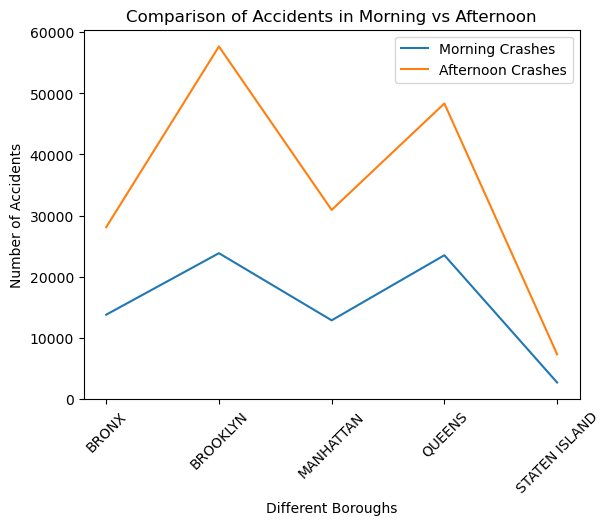

In [232]:
fig, ax = plt.subplots()

ax.plot(borough_counts1.index, borough_counts1.values, label='Morning Crashes')

ax.plot(borough_counts2.index, borough_counts2.values, label='Afternoon Crashes')

ax.set_xlabel('Different Boroughs')
ax.set_ylabel('Number of Accidents')
ax.set_title('Comparison of Accidents in Morning vs Afternoon')

plt.xticks(rotation=45)

ax.legend()

plt.show()

# Data shows that there is a clear increase in accidents after the normal work shift has ended in all 5 boroughs. 
# Additional note: Staten Island appears to have had the least amount of a increase.

In [233]:
fatality_df['CRASH TIME'] = pd.to_datetime(fatality_df['CRASH TIME'])

morning_rh_df = fatality_df[(fatality_df['CRASH TIME'].dt.hour >= 5) & (fatality_df['CRASH TIME'].dt.hour < 9)]
afternoon_rh_df = fatality_df[(fatality_df['CRASH TIME'].dt.hour >= 15) & (fatality_df['CRASH TIME'].dt.hour < 19)]

borough_counts1 = morning_rh_df['BOROUGH'].value_counts().sort_index()
borough_counts2 = afternoon_rh_df['BOROUGH'].value_counts().sort_index()

C:\Users\sbenn\AppData\Local\Temp\ipykernel_15640\4238913450.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fatality_df['CRASH TIME'] = pd.to_datetime(fatality_df['CRASH TIME'])


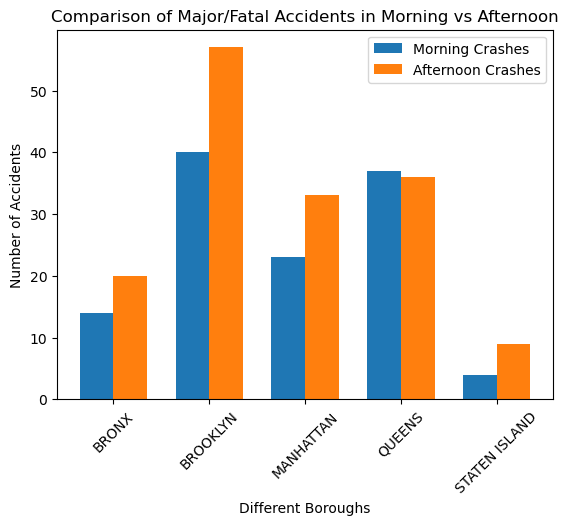

In [234]:
bar_width = 0.35

x1 = np.arange(len(borough_counts1))
x2 = [x + bar_width for x in x1]

fig, ax = plt.subplots()

ax.bar(x1, borough_counts1.values, width=bar_width, label='Morning Crashes')

ax.bar(x2, borough_counts2.values, width=bar_width, label='Afternoon Crashes')

ax.set_xlabel('Different Boroughs')
ax.set_ylabel('Number of Accidents')
ax.set_title('Comparison of Major/Fatal Accidents in Morning vs Afternoon')

ax.set_xticks(x1 + bar_width / 2)
ax.set_xticklabels(borough_counts1.index)

plt.xticks(rotation=45)

ax.legend()

plt.show()

# Data shows that there is a clear increase in accidents after the normal work shift has ended in 4 of the 5 boroughs.

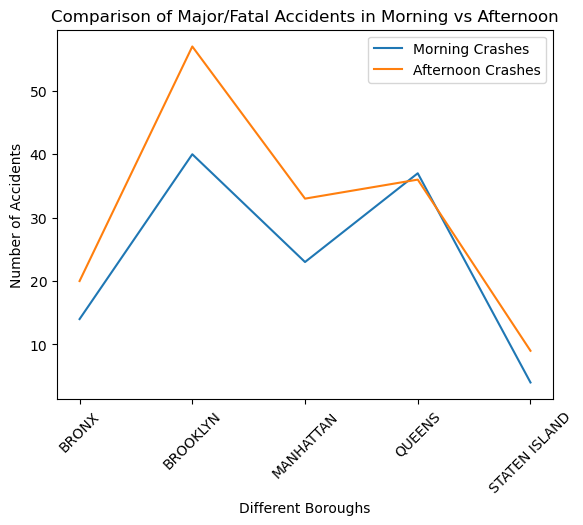

In [235]:
fig, ax = plt.subplots()

ax.plot(borough_counts1.index, borough_counts1.values, label='Morning Crashes')

ax.plot(borough_counts2.index, borough_counts2.values, label='Afternoon Crashes')

ax.set_xlabel('Different Boroughs')
ax.set_ylabel('Number of Accidents')
ax.set_title('Comparison of Major/Fatal Accidents in Morning vs Afternoon')

plt.xticks(rotation=45)

ax.legend()

plt.show()

# Data shows that there is a clear increase in accidents after the normal work shift has ended in 4 of the 5 boroughs. 

In [236]:
# Both bar and line charts shows a clear difference of morning commute time crashes vs afternoon commute times in 4 of the 5 boroughs. (On average afternoon had substantially more accidents)
# Further study would be needed regarding why Queens broke the norm of the other 4 boroughs.

# Possible Solution:
# Public awareness about possible road rage post work  shifts.
# Incentivize businesses to start and end shifts outside of the normal business day to reduce traffic bottlenecks.
# Increased police, verify signage, lower speed limits during high traffic times.


In [237]:
############################################################################################################################################
############################################################################################################################################
# QUESTION 4: JOAN
# Are specific NYC Boroughs more likely to have accidents than others?
############################################################################################################################################
############################################################################################################################################

In [238]:
brooklyn_df = crashes_df[crashes_df['BOROUGH'] == 'BROOKLYN']
brooklyn_count = brooklyn_df['BOROUGH'].count()

bronx_df = crashes_df[crashes_df['BOROUGH'] == 'BRONX']
bronx_count = bronx_df['BOROUGH'].count()

manhattan_df = crashes_df[crashes_df['BOROUGH'] == 'MANHATTAN']
manhattan_count = manhattan_df['BOROUGH'].count()

staten_df = crashes_df[crashes_df['BOROUGH'] == 'STATEN ISLAND']
staten_count = staten_df['BOROUGH'].count()

queens_df = crashes_df[crashes_df['BOROUGH'] == 'QUEENS']
queens_count = queens_df['BOROUGH'].count()

In [239]:
bronx_count_norm = (bronx_df['BOROUGH'].count() / county_pop_df.loc[county_pop_df['NAME'] == 'Bronx', 'Population'].values[0]) * 10000

brooklyn_count_norm = (brooklyn_df['BOROUGH'].count() / county_pop_df.loc[county_pop_df['NAME'] == 'Brooklyn', 'Population'].values[0]) * 10000

manhattan_count_norm = (manhattan_df['BOROUGH'].count() / county_pop_df.loc[county_pop_df['NAME'] == 'Manhattan', 'Population'].values[0]) * 10000

queens_count_norm = (queens_df['BOROUGH'].count() / county_pop_df.loc[county_pop_df['NAME'] == 'Queens', 'Population'].values[0]) * 10000

staten_count_norm = (staten_df['BOROUGH'].count() / county_pop_df.loc[county_pop_df['NAME'] == 'Staten Island', 'Population'].values[0]) * 10000

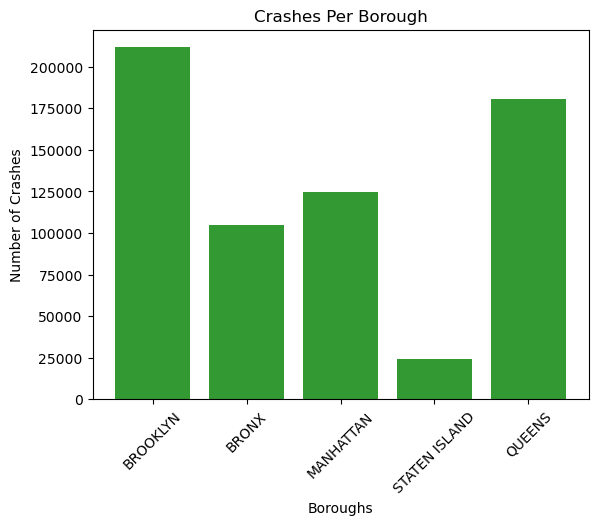

In [240]:
boroughs_df = [brooklyn_count, bronx_count, manhattan_count, staten_count, queens_count]
x_axis = ['BROOKLYN','BRONX','MANHATTAN','STATEN ISLAND','QUEENS']
y_axis = boroughs_df
plt.bar(x_axis, y_axis, color='g', alpha=0.8, align="center")
plt.xticks(rotation = 45)
plt.title("Crashes Per Borough")
plt.xlabel("Boroughs")
plt.ylabel("Number of Crashes")
plt.show()

# The graphs shows that Brooklyn and Queens are more likely to have accidents than the other 3 boroughs

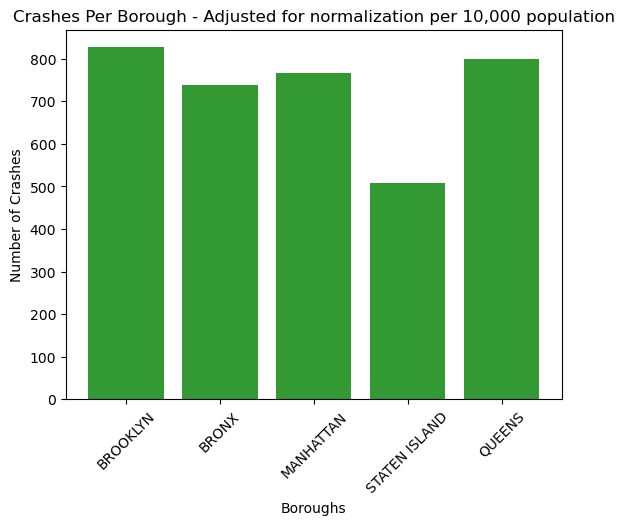

In [241]:
boroughs_df = [brooklyn_count_norm, bronx_count_norm, manhattan_count_norm, staten_count_norm, queens_count_norm]
x_axis = ['BROOKLYN','BRONX','MANHATTAN','STATEN ISLAND','QUEENS']
y_axis = boroughs_df
plt.bar(x_axis, y_axis, color='g', alpha=0.8, align="center")
plt.xticks(rotation = 45)
plt.title("Crashes Per Borough - Adjusted for normalization per 10,000 population")
plt.xlabel("Boroughs")
plt.ylabel("Number of Crashes")
plt.show()

# When population is normalized Staten Island appears to have less accidents than the other 4 boroughs.

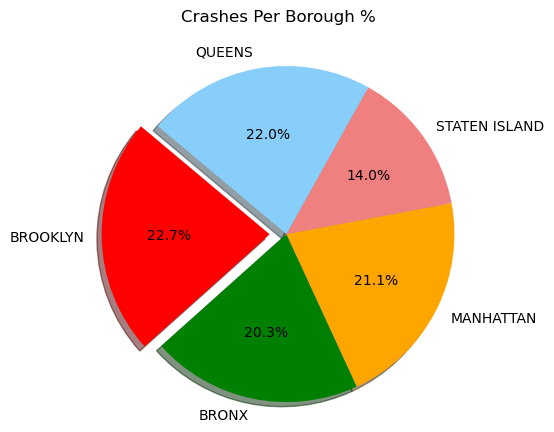

In [242]:
colors = ["red", "green", "orange", "lightcoral", "lightskyblue"]
explode = (0.1, 0, 0, 0, 0)
plt.pie(boroughs_df, explode=explode, labels=x_axis, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("Crashes Per Borough %", pad=20)
plt.show()

# Percentage wise Brooklyn is the most likely borough to have accidents in NYC

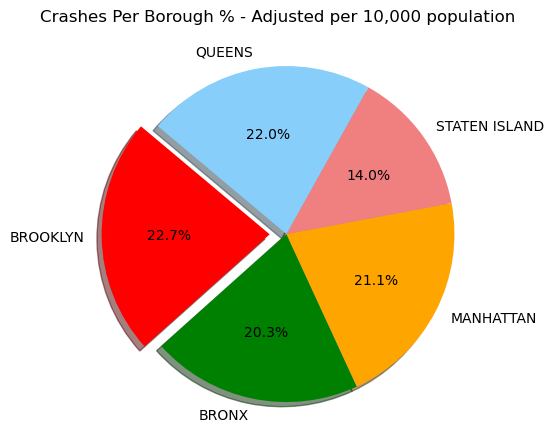

In [243]:
colors = ["red", "green", "orange", "lightcoral", "lightskyblue"]
explode = (0.1, 0, 0, 0, 0)
plt.pie(boroughs_df, explode=explode, labels=x_axis, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("Crashes Per Borough % - Adjusted per 10,000 population", pad=20)
plt.show()

# Normalizing the data based on population the results become more evenly distributed - Brooklyn is still the highest by a very slight margin. 

In [244]:
brooklyn_ftl_df = fatality_df[fatality_df['BOROUGH'] == 'BROOKLYN']
brooklyn_ftl_count = brooklyn_ftl_df['BOROUGH'].count()

bronx_ftl_df = fatality_df[fatality_df['BOROUGH'] == 'BRONX']
bronx_ftl_count = bronx_ftl_df['BOROUGH'].count()

manhattan_ftl_df = fatality_df[fatality_df['BOROUGH'] == 'MANHATTAN']
manhattan_ftl_count = manhattan_ftl_df['BOROUGH'].count()

staten_ftl_df = fatality_df[fatality_df['BOROUGH'] == 'STATEN ISLAND']
staten_ftl_count = staten_ftl_df['BOROUGH'].count()

queens_ftl_df = fatality_df[fatality_df['BOROUGH'] == 'QUEENS']
queens_ftl_count = queens_ftl_df['BOROUGH'].count()

In [245]:
bronx_ftl_count_norm = (bronx_ftl_df['BOROUGH'].count() / county_pop_df.loc[county_pop_df['NAME'] == 'Bronx', 'Population'].values[0]) * 10000

brooklyn_ftl_count_norm = (brooklyn_ftl_df['BOROUGH'].count() / county_pop_df.loc[county_pop_df['NAME'] == 'Brooklyn', 'Population'].values[0]) * 10000

manhattan_ftl_count_norm = (manhattan_ftl_df['BOROUGH'].count() / county_pop_df.loc[county_pop_df['NAME'] == 'Manhattan', 'Population'].values[0]) * 10000

queens_ftl_count_norm = (queens_ftl_df['BOROUGH'].count() / county_pop_df.loc[county_pop_df['NAME'] == 'Queens', 'Population'].values[0]) * 10000

staten_ftl_count_norm = (staten_ftl_df['BOROUGH'].count() / county_pop_df.loc[county_pop_df['NAME'] == 'Staten Island', 'Population'].values[0]) * 10000

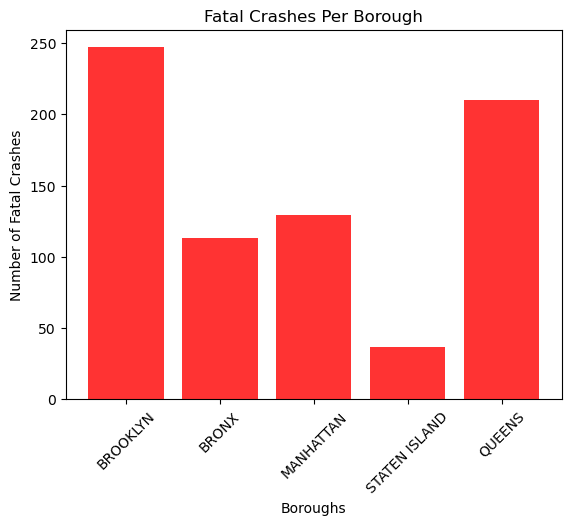

In [246]:
boroughs_ftl_df = [brooklyn_ftl_count, bronx_ftl_count, manhattan_ftl_count, staten_ftl_count, queens_ftl_count]
x_axis = ['BROOKLYN','BRONX','MANHATTAN','STATEN ISLAND','QUEENS']
y_axis = boroughs_ftl_df
plt.bar(x_axis, y_axis, color='r', alpha=0.8, align="center")
plt.xticks(rotation = 45)
plt.title("Fatal Crashes Per Borough")
plt.xlabel("Boroughs")
plt.ylabel("Number of Fatal Crashes")
plt.show()

# The graphs shows that Brooklyn and Queens are more likely to have accidents than the other 3 boroughs

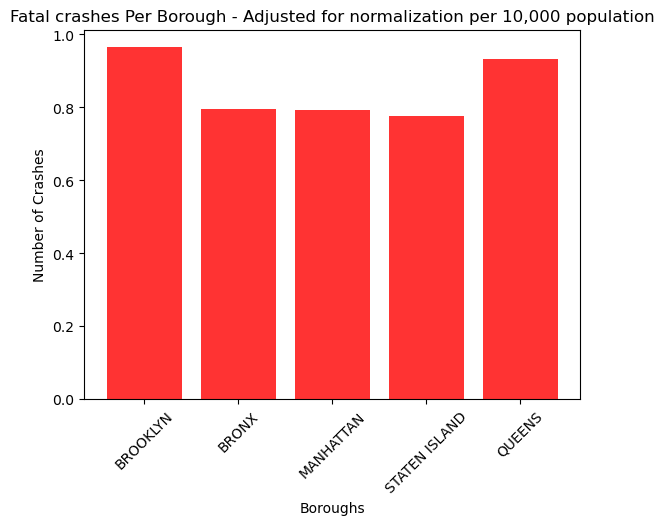

In [247]:
boroughs_ftl_df = [brooklyn_ftl_count_norm, bronx_ftl_count_norm, manhattan_ftl_count_norm, staten_ftl_count_norm, queens_ftl_count_norm]
x_axis = ['BROOKLYN','BRONX','MANHATTAN','STATEN ISLAND','QUEENS']
y_axis = boroughs_ftl_df
plt.bar(x_axis, y_axis, color='r', alpha=0.8, align="center")
plt.xticks(rotation = 45)
plt.title("Fatal crashes Per Borough - Adjusted for normalization per 10,000 population")
plt.xlabel("Boroughs")
plt.ylabel("Number of Crashes")
plt.show()

# When population is normalized Staten Island appears to have less accidents than the other 4 boroughs.

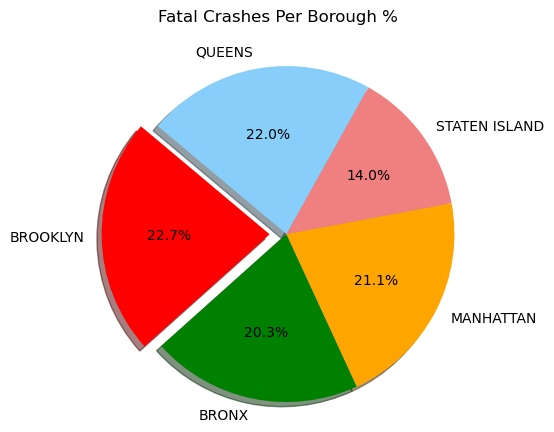

In [248]:
colors = ["red", "green", "orange", "lightcoral", "lightskyblue"]
explode = (0.1, 0, 0, 0, 0)
plt.pie(boroughs_df, explode=explode, labels=x_axis, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("Fatal Crashes Per Borough %", pad=20)
plt.show()

# Percentage wise Brooklyn is the most likely borough to have accidents in NYC

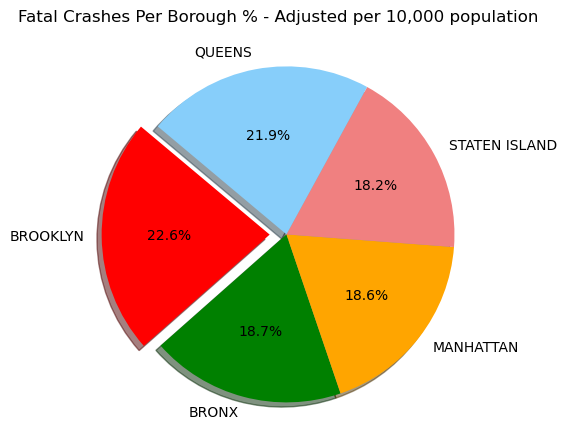

In [249]:
colors = ["red", "green", "orange", "lightcoral", "lightskyblue"]
explode = (0.1, 0, 0, 0, 0)
plt.pie(boroughs_ftl_df, explode=explode, labels=x_axis, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("Fatal Crashes Per Borough % - Adjusted per 10,000 population", pad=20)
plt.show()

# Normalizing the data based on population the percentages appear to equalize and become more even - Brooklyn is still the highest by a very slight margin. 

In [250]:
# When comparing graphs and pie charts from all crash data vs fatal crash data - we found the results to be equivalent visually to each other.

# Possible Solution:
# Consider adding some or more speed bumps in the higher risk boroughs.
# Increased police, verify signage, lower speed limits during high traffic times.


In [251]:
############################################################################################################################################
############################################################################################################################################
# QUESTION 5: JOAN
# Is there a noticable trend with how many vehicles are involved in a crash? 
# Compare if accidents had multiple vehicles more often than your normal 2 car accident. 
############################################################################################################################################
############################################################################################################################################

In [252]:
crashes_df['NUMBER OF VEHICLES'] = crashes_df[['VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5']].count(axis=1)
crashes_df.drop(columns=['NUMBER OF PERSONS INJURED', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'], inplace=True)
crashes_df

,CRASH DATE,CRASH TIME,BOROUGH,LATITUDE,LONGITUDE,NUMBER OF PERSONS KILLED,NUMBER OF VEHICLES,YEAR
3,9/11/2021,2023-05-18 09:35:00,BROOKLYN,40.667202,-73.866500,0.0,1,2021
7,12/14/2021,2023-05-18 08:17:00,BRONX,40.868160,-73.831480,0.0,2,2021
8,12/14/2021,2023-05-18 21:10:00,BROOKLYN,40.671720,-73.897100,0.0,1,2021
9,12/14/2021,2023-05-18 14:58:00,MANHATTAN,40.751440,-73.973970,0.0,2,2021
11,12/14/2021,2023-05-18 16:50:00,QUEENS,40.675884,-73.755770,0.0,2,2021
...,...,...,...,...,...,...,...,...
1048563,9/10/2016,2023-05-18 18:39:00,MANHATTAN,40.746490,-74.001335,0.0,3,2016
1048564,8/22/2016,2023-05-18 15:30:00,QUEENS,40.665504,-73.856120,0.0,2,2016
1048566,8/29/2016,2023-05-18 13:45:00,QUEENS,40.686516,-73.846540,0.0,1,2016
1048568,9/10/2016,2023-05-18 11:00:00,QUEENS,40.680490,-73.774704,0.0,2,2016


In [253]:

one_car = crashes_df[crashes_df['NUMBER OF VEHICLES'] == 1]
one_count = one_car['NUMBER OF VEHICLES'].count()

two_cars = crashes_df[crashes_df['NUMBER OF VEHICLES'] == 2]
two_count = two_cars['NUMBER OF VEHICLES'].count()

three_cars = crashes_df[crashes_df['NUMBER OF VEHICLES'] == 3]
three_count = three_cars['NUMBER OF VEHICLES'].count()

four_cars = crashes_df[crashes_df['NUMBER OF VEHICLES'] == 4]
four_count = four_cars['NUMBER OF VEHICLES'].count()

five_cars = crashes_df[crashes_df['NUMBER OF VEHICLES'] >= 5]
five_count = five_cars['NUMBER OF VEHICLES'].count()

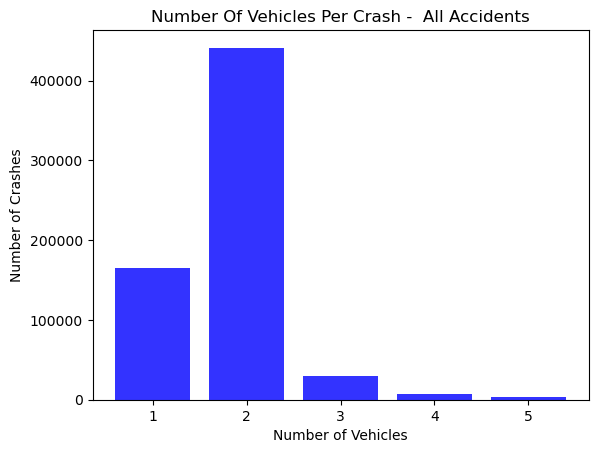

In [254]:
number_of_vehicles = [one_count, two_count, three_count, four_count, five_count]
x_axis = ['1','2','3','4','5']
y_axis = number_of_vehicles
plt.bar(x_axis, y_axis, color='b', alpha=0.8, align="center")
plt.title("Number Of Vehicles Per Crash -  All Accidents")
plt.xlabel("Number of Vehicles")
plt.ylabel("Number of Crashes")
plt.show()

# As one would suspect - most accidents typically will involve two vehicles.  
# This confirms that by a large margin. 


In [255]:
fatality_df['NUMBER OF VEHICLES'] = fatality_df[['VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5']].count(axis=1)
fatality_df.drop(columns=['NUMBER OF PERSONS INJURED', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'], inplace=True)
fatality_df

C:\Users\sbenn\AppData\Local\Temp\ipykernel_15640\133045502.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fatality_df['NUMBER OF VEHICLES'] = fatality_df[['VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5']].count(axis=1)
C:\Users\sbenn\AppData\Local\Temp\ipykernel_15640\133045502.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fatality_df.drop(columns=['NUMBER OF PERSONS INJURED', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 

,CRASH DATE,CRASH TIME,BOROUGH,LATITUDE,LONGITUDE,NUMBER OF PERSONS KILLED,NUMBER OF VEHICLES,YEAR
591,4/15/2021,2023-05-18 15:18:00,BROOKLYN,40.620487,-74.029305,1.0,1,2021
1350,7/8/2021,2023-05-18 22:03:00,MANHATTAN,40.721474,-73.983830,1.0,2,2021
2346,8/27/2021,2023-05-18 09:15:00,MANHATTAN,40.805740,-73.942764,1.0,1,2021
2437,9/11/2021,2023-05-18 18:18:00,BROOKLYN,40.684204,-73.968060,1.0,2,2021
2607,4/8/2021,2023-05-18 19:55:00,BRONX,40.830307,-73.898730,1.0,1,2021
...,...,...,...,...,...,...,...,...
1031260,10/7/2016,2023-05-18 14:47:00,MANHATTAN,0.000000,0.000000,1.0,1,2016
1032436,10/4/2016,2023-05-18 09:49:00,MANHATTAN,40.719933,-73.978760,1.0,1,2016
1035830,9/30/2016,2023-05-18 12:16:00,STATEN ISLAND,40.626663,-74.075650,1.0,1,2016
1037943,9/13/2016,2023-05-18 19:41:00,MANHATTAN,40.810684,-73.954520,1.0,1,2016


In [256]:
one_car = fatality_df[fatality_df['NUMBER OF VEHICLES'] == 1]
one_count = one_car['NUMBER OF VEHICLES'].count()

two_cars = fatality_df[fatality_df['NUMBER OF VEHICLES'] == 2]
two_count = two_cars['NUMBER OF VEHICLES'].count()

three_cars = fatality_df[fatality_df['NUMBER OF VEHICLES'] == 3]
three_count = three_cars['NUMBER OF VEHICLES'].count()

four_cars = fatality_df[fatality_df['NUMBER OF VEHICLES'] == 4]
four_count = four_cars['NUMBER OF VEHICLES'].count()

five_cars = fatality_df[fatality_df['NUMBER OF VEHICLES'] >= 5]
five_count = five_cars['NUMBER OF VEHICLES'].count()

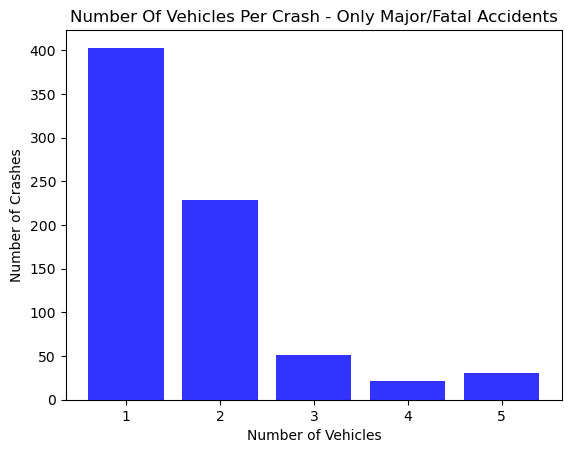

In [257]:
FTLnumber_of_vehicles = [one_count, two_count, three_count, four_count, five_count]
x_axis = ['1','2','3','4','5']
y_axis = FTLnumber_of_vehicles
plt.bar(x_axis, y_axis, color='b', alpha=0.8, align="center")
plt.title("Number Of Vehicles Per Crash - Only Major/Fatal Accidents")
plt.xlabel("Number of Vehicles")
plt.ylabel("Number of Crashes")
plt.show()

#When viewing only major/fatal accidents we have a huge swing towards single car involvement.
#This could indicate that pedestrian related accidents with single vehicles are the leading cause of major/fatal accidents in NYC.
#Drunk drivers could also be a factor smashing into poles, buildings, and unfortunately people.


In [258]:
# Possible solution
# City marketing campaigns to increase awareness when driving to reduce speeds and keep eyes on the road.
# City marketing campaigns to increase awareness when driving to pay attention to cyclist, scooters, and pedestrians.
# Drunk driving may have a critical role in this visualization. Unfortunately in the data provided cannot be sure and it will need further research.
# Verify crosswalks are clearly marked / walk & stop signs are functioning to help reduce single vehicle accidents. (Presumably with pedestrians)
# Focus on reducing speed and possible road-rage to help reduce risk of accidents.


In [259]:
############################################################################################################################################
############################################################################################################################################
# QUESTION 6: JOAN
# Determine if accidents are more likely during certain months.
############################################################################################################################################
############################################################################################################################################

In [260]:
crashes_df['MONTH'] = pd.DatetimeIndex(crashes_df['CRASH DATE']).month
fatality_df['MONTH'] = pd.DatetimeIndex(fatality_df['CRASH DATE']).month
#crashes_df.head()

C:\Users\sbenn\AppData\Local\Temp\ipykernel_15640\2067322478.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fatality_df['MONTH'] = pd.DatetimeIndex(fatality_df['CRASH DATE']).month


In [261]:
january = crashes_df[crashes_df['MONTH'] == 1]
jan = january['MONTH'].count()

febuary = crashes_df[crashes_df['MONTH'] == 2]
feb = febuary['MONTH'].count()

march = crashes_df[crashes_df['MONTH'] == 3]
mar = march['MONTH'].count()

april = crashes_df[crashes_df['MONTH'] == 4]
apr = april['MONTH'].count()

may_df = crashes_df[crashes_df['MONTH'] == 5]
may = may_df['MONTH'].count()

june = crashes_df[crashes_df['MONTH'] == 6]
jun = june['MONTH'].count()

july = crashes_df[crashes_df['MONTH'] == 7]
jul = july['MONTH'].count()

august = crashes_df[crashes_df['MONTH'] == 8]
aug = august['MONTH'].count()

september = crashes_df[crashes_df['MONTH'] == 9]
sep = september['MONTH'].count()

october = crashes_df[crashes_df['MONTH'] == 10]
octo = october['MONTH'].count()

november = crashes_df[crashes_df['MONTH'] == 11]
nov = november['MONTH'].count()

december = crashes_df[crashes_df['MONTH'] == 12]
dec = december['MONTH'].count()

FTLjanuary = fatality_df[fatality_df['MONTH'] == 1]
FTLjan = FTLjanuary['MONTH'].count()

FTLfebuary = fatality_df[fatality_df['MONTH'] == 2]
FTLfeb = FTLfebuary['MONTH'].count()

FTLmarch = fatality_df[fatality_df['MONTH'] == 3]
FTLmar = FTLmarch['MONTH'].count()

FTLapril = fatality_df[fatality_df['MONTH'] == 4]
FTLapr = FTLapril['MONTH'].count()

FTLmay_df = fatality_df[fatality_df['MONTH'] == 5]
FTLmay = FTLmay_df['MONTH'].count()

FTLjune = fatality_df[fatality_df['MONTH'] == 6]
FTLjun = FTLjune['MONTH'].count()

FTLjuly = fatality_df[fatality_df['MONTH'] == 7]
FTLjul = FTLjuly['MONTH'].count()

FTLaugust = fatality_df[fatality_df['MONTH'] == 8]
FTLaug = FTLaugust['MONTH'].count()

FTLseptember = fatality_df[fatality_df['MONTH'] == 9]
FTLsep = FTLseptember['MONTH'].count()

FTLoctober = fatality_df[fatality_df['MONTH'] == 10]
FTLocto = FTLoctober['MONTH'].count()

FTLnovember = fatality_df[fatality_df['MONTH'] == 11]
FTLnov = FTLnovember['MONTH'].count()

FTLdecember = fatality_df[fatality_df['MONTH'] == 12]
FTLdec = FTLdecember['MONTH'].count()

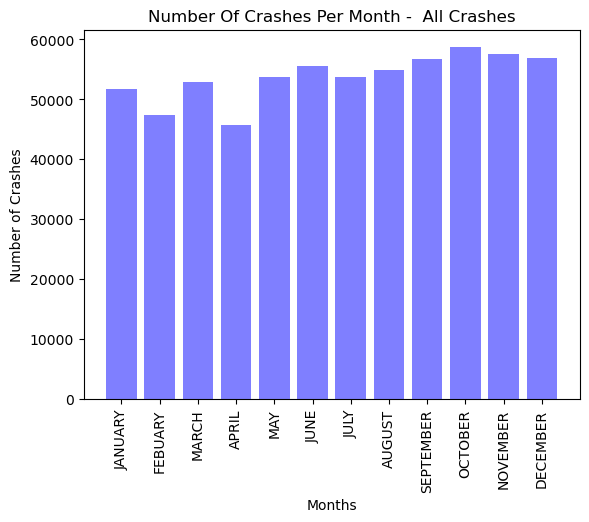

In [262]:
months = [jan, feb, mar, apr, may, jun, jul, aug, sep, octo, nov, dec]
x_axis = ['JANUARY','FEBUARY','MARCH','APRIL','MAY','JUNE','JULY','AUGUST','SEPTEMBER','OCTOBER','NOVEMBER','DECEMBER']
y_axis = months
plt.bar(x_axis, y_axis, color='b', alpha=0.5, align="center")
plt.xticks(rotation = 90)
plt.title("Number Of Crashes Per Month -  All Crashes")
plt.xlabel("Months")
plt.ylabel("Number of Crashes")
plt.show()

# The data displayed evenly across each of the months with a small exception of maybe February or April 

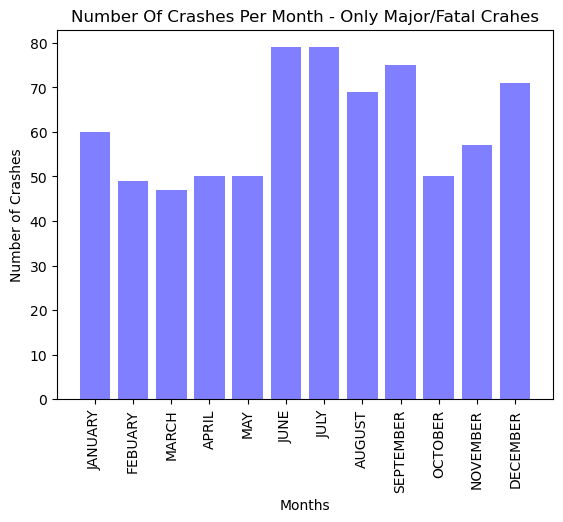

In [263]:
months = [FTLjan, FTLfeb, FTLmar, FTLapr, FTLmay, FTLjun, FTLjul, FTLaug, FTLsep, FTLocto, FTLnov, FTLdec]
x_axis = ['JANUARY','FEBUARY','MARCH','APRIL','MAY','JUNE','JULY','AUGUST','SEPTEMBER','OCTOBER','NOVEMBER','DECEMBER']
y_axis = months
plt.bar(x_axis, y_axis, color='b', alpha=0.5, align="center")
plt.xticks(rotation = 90)
plt.title("Number Of Crashes Per Month - Only Major/Fatal Crahes")
plt.xlabel("Months")
plt.ylabel("Number of Crashes")
plt.show()

# The data displayed quite differently compared to the all-crashes graph.  Here we can see a spike during winter and then again during summer.

In [264]:
#Possible solution:
# During nicer weather months consider reducing speeds and more public awareness since vehicles are likely moving faster.
# During the December and January months the city could work on de-icing methods, clearing roadways, and public education about speed/winter habits.
# Review needs for road repairs that could be causing accidents.
# Increased police, verify signage, lower speed limits during high traffic times.


In [265]:
############################################################################################################################################
############################################################################################################################################
# QUESTION 7: GINGER
# Can we better visualize the number of crashes based on the time of day, month, or number of vehicles through scatter plots.
############################################################################################################################################
############################################################################################################################################

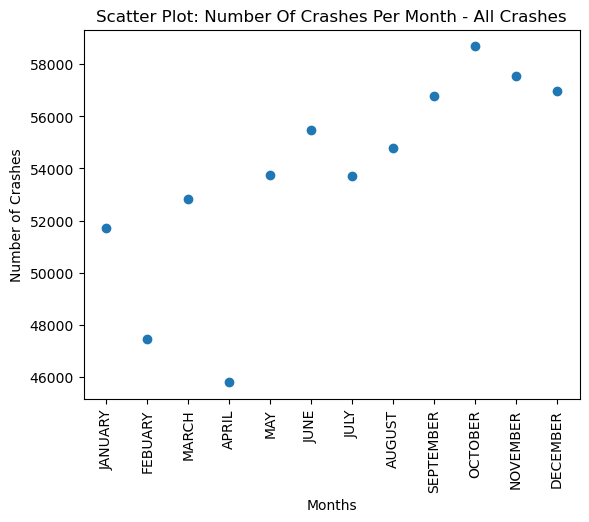

In [266]:
months = [jan, feb, mar, apr, may, jun, jul, aug, sep, octo, nov, dec]
x_axis = ['JANUARY','FEBUARY','MARCH','APRIL','MAY','JUNE','JULY','AUGUST','SEPTEMBER','OCTOBER','NOVEMBER','DECEMBER']
y_axis = months

fig, ax = plt.subplots()
ax.scatter(x_axis, y_axis)
ax.set_xlabel("Months")
plt.title("Scatter Plot: Number Of Crashes Per Month - All Crashes")
ax.set_ylabel("Number of Crashes")
plt.xticks(rotation = 90)
plt.show()

# The data displayed evenly across each of the months with a small exception of maybe February or April 

# When displayed as a scatter plot it provides a more simple view detailing the difference of each month.

# Using time series forecasting we concluded in this 5 year window of data that future accidents will also peak during September through December

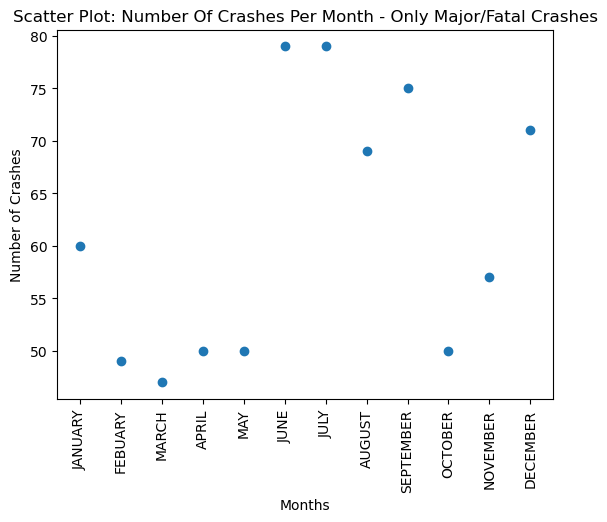

In [267]:
months = [FTLjan, FTLfeb, FTLmar, FTLapr, FTLmay, FTLjun, FTLjul, FTLaug, FTLsep, FTLocto, FTLnov, FTLdec]
x_axis = ['JANUARY','FEBUARY','MARCH','APRIL','MAY','JUNE','JULY','AUGUST','SEPTEMBER','OCTOBER','NOVEMBER','DECEMBER']
y_axis = months

fig, ax = plt.subplots()
ax.scatter(x_axis, y_axis)
ax.set_xlabel("Months")
plt.title("Scatter Plot: Number Of Crashes Per Month - Only Major/Fatal Crashes")
ax.set_ylabel("Number of Crashes")
plt.xticks(rotation = 90)
plt.show()

# The data displayed quite differently compared to the all-crashes graph.  Here we can see a spike during winter and then again during summer.

# However there is less of a noticeable  upward trend.  The data is bit more erratic up and down across the months.

# Using time series forecasting we concluded in this 5 year window of data that future major/fatal accidents will spike starting around June (summer) and then spike again in December (winter).

In [268]:
# Possible solution
# During nicer weather months consider reducing speeds and more public awareness since vehicles are likely moving faster.
# Same can be said during winter time when roadways could be slippery or have hazards. 
# Could also indicate the need for road repairs that could be causing accidents.

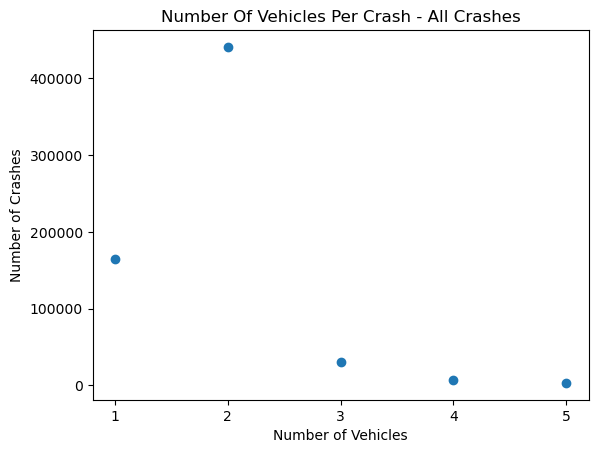

In [269]:
x_axis = ['1','2','3','4','5']
y_axis = number_of_vehicles
fig, ax = plt.subplots()
ax.scatter(x_axis, y_axis)
ax.set_xlabel("Number of Vehicles")
ax.set_ylabel("Number of Crashes")
plt.title("Number Of Vehicles Per Crash - All Crashes")
plt.show()

# When displayed as a scatter plot it reflects equally to the bar chart results, showing that the common perception of a accident most commonly involves two vehicles is true.

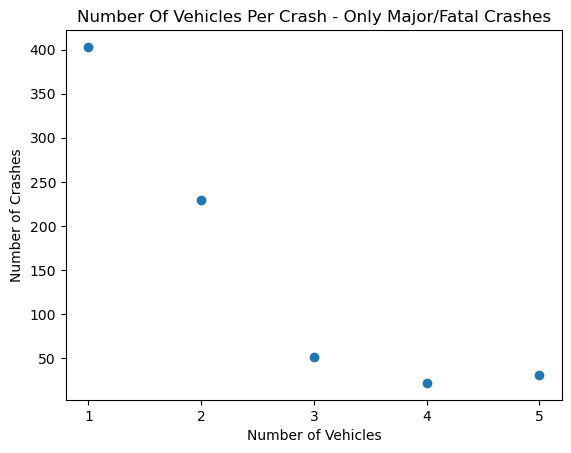

In [270]:
x_axis = ['1','2','3','4','5']
y_axis = FTLnumber_of_vehicles
fig, ax = plt.subplots()
ax.scatter(x_axis, y_axis)
ax.set_xlabel("Number of Vehicles")
ax.set_ylabel("Number of Crashes")
plt.title("Number Of Vehicles Per Crash - Only Major/Fatal Crashes")
plt.show()

# When displayed as a scatter plot it reflects equally to the bar chart results, showing that single car accidents (likely with pedestrians) are the #1 cause of major/fatal accidents in NYC.

In [271]:
# Possible solution
# City marketing campaigns to increase awareness when driving to reduce speeds and keep eyes on the road.
# City marketing campaigns to increase awareness when driving to pay attention to cyclist, scooters, and pedestrians.
# Verify crosswalks are clearly marked / walk & stop signs are functioning to help reduce single vehicle accidents. (Presumably with pedestrians)
# Increased police, verify signage, lower speed limits during high traffic times.

In [272]:
############################################################################################################################################
############################################################################################################################################
# QUESTION 8: GINGER
# Can we use the time of day as a prediciton method for future crashes?
############################################################################################################################################
############################################################################################################################################

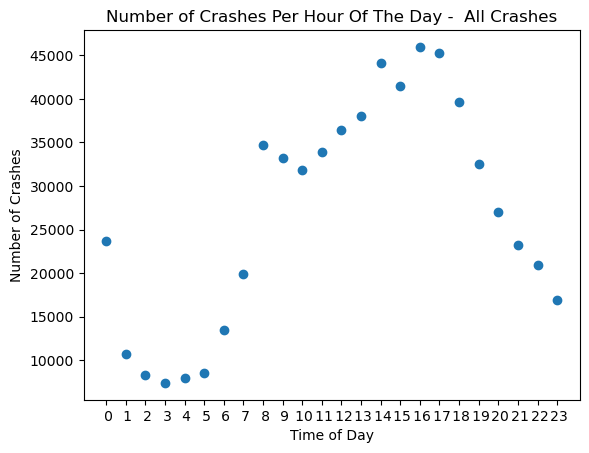

In [273]:
crashes_df['CRASH TIME'] = pd.to_datetime(crashes_df['CRASH TIME'])
crashes_df['TIME'] = crashes_df['CRASH TIME'].dt.hour


time = []
timeval = []

for x in range(24):
    timeofday = crashes_df[(crashes_df['TIME'] == x)]
    time.append(timeofday['TIME'].count())
    timeval.append(f"   {x}  ")
    
x_axis = timeval
y_axis = time
fig, ax = plt.subplots()
ax.scatter(x_axis, y_axis)
ax.set_xlabel("Time of Day")
ax.set_ylabel("Number of Crashes")
plt.title("Number of Crashes Per Hour Of The Day -  All Crashes")
ax.set_xticks(timeval)

plt.show()

# The scatter plot shows a trend that as the workday ends the number of accidents goes up around 2 pm peaking around 4 to 5 pm then declines as the night ends.
# There is also a clear spike in accidents when the morning commute begins.
# This confirms our previous findings when looking at commute times.

# Using time series forecasting we concluded in this 5 year window of data that future accidents will also peak starting in the morning around 7 am reaching a maximum at 3 pm.

C:\Users\sbenn\AppData\Local\Temp\ipykernel_15640\2199001059.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fatality_df['CRASH TIME'] = pd.to_datetime(fatality_df['CRASH TIME'])
C:\Users\sbenn\AppData\Local\Temp\ipykernel_15640\2199001059.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fatality_df['TIME'] = fatality_df['CRASH TIME'].dt.hour


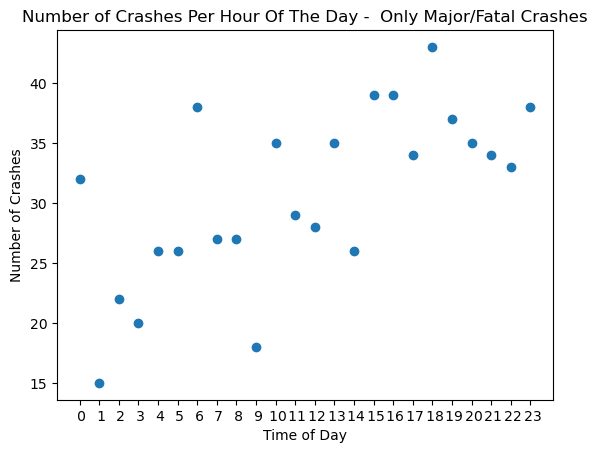

In [274]:
fatality_df['CRASH TIME'] = pd.to_datetime(fatality_df['CRASH TIME'])
fatality_df['TIME'] = fatality_df['CRASH TIME'].dt.hour


time = []
timeval = []

for x in range(24):
    timeofday = fatality_df[(fatality_df['TIME'] == x)]
    time.append(timeofday['TIME'].count())
    timeval.append(f"   {x}  ")
    
x_axis = timeval
y_axis = time
fig, ax = plt.subplots()
ax.scatter(x_axis, y_axis)
ax.set_xlabel("Time of Day")
ax.set_ylabel("Number of Crashes")
plt.title("Number of Crashes Per Hour Of The Day -  Only Major/Fatal Crashes")
ax.set_xticks(timeval)

plt.show()

# When only viewing major/fatal accidents the correlation of time vs event becomes a quite a bit less predictable.
# There is still a slight upward trend as the day goes on the number of incidents occur and a slight taper at the end of the day.
# However it is not nearly as clear cut as before.

In [275]:
# Scatter plots definitely helped confirm our previous findings and helped solidify our thoughts / questions.
# They provided clear visualizations over bar or line charts in the majority of the uses.

# Possible solution
# Public awareness about possible road rage post work  shifts when you're more likely tired.  
# Incentivize businesses to start and end shifts outside of the normal business day to reduce traffic bottlenecks.
# Focus on reducing speed and possible road-rage to help reduce risk of accidents.
# Increased police, verify signage, lower speed limits during high traffic times.

In [276]:
############################################################################################################################################
############################################################################################################################################
# QUESTION 9: GINGER
# Does winter or summer have any effect on the number of accidents?
############################################################################################################################################
############################################################################################################################################

In [277]:
crashes_df['CRASH DATE'] = pd.to_datetime(crashes_df['CRASH DATE'])
crashes_df['CRASH TIME'] = pd.to_datetime(crashes_df['CRASH TIME'])

summer_df = crashes_df[(crashes_df['CRASH DATE'].dt.month == 6) | (crashes_df['CRASH DATE'].dt.month == 7) | (crashes_df['CRASH DATE'].dt.month == 8)].copy()
winter_df = crashes_df[(crashes_df['CRASH DATE'].dt.month >= 11) | (crashes_df['CRASH DATE'].dt.month <= 1)].copy()

borough_counts1 = winter_df['BOROUGH'].value_counts().sort_index()
borough_counts2 = summer_df['BOROUGH'].value_counts().sort_index()

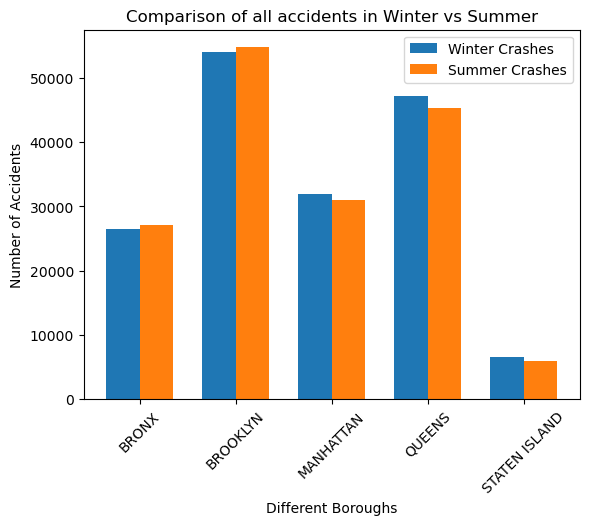

In [278]:
bar_width = 0.35

x1 = np.arange(len(borough_counts1))
x2 = [x + bar_width for x in x1]

fig, ax = plt.subplots()

ax.bar(x1, borough_counts1.values, width=bar_width, label='Winter Crashes')

ax.bar(x2, borough_counts2.values, width=bar_width, label='Summer Crashes')

ax.set_xlabel('Different Boroughs')
ax.set_ylabel('Number of Accidents')
ax.set_title('Comparison of all accidents in Winter vs Summer')

ax.set_xticks(x1 + bar_width / 2)
ax.set_xticklabels(borough_counts1.index)

plt.xticks(rotation=45)

ax.legend()

plt.show()

# When viewing the entire set of data it looks like they are all very close going back and forth between boroughs.  
# There is no clear pattern if winter or summer is more predominant. 

In [279]:
fatality_df['CRASH DATE'] = pd.to_datetime(fatality_df['CRASH DATE'])
fatality_df['CRASH TIME'] = pd.to_datetime(fatality_df['CRASH TIME'])

summer_df = fatality_df[(fatality_df['CRASH DATE'].dt.month == 6) | (fatality_df['CRASH DATE'].dt.month == 7) | (fatality_df['CRASH DATE'].dt.month == 8)].copy()
winter_df = fatality_df[(fatality_df['CRASH DATE'].dt.month >= 11) | (fatality_df['CRASH DATE'].dt.month <= 1)].copy()

borough_counts1 = winter_df['BOROUGH'].value_counts().sort_index()
borough_counts2 = summer_df['BOROUGH'].value_counts().sort_index()

C:\Users\sbenn\AppData\Local\Temp\ipykernel_15640\1378349009.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fatality_df['CRASH DATE'] = pd.to_datetime(fatality_df['CRASH DATE'])
C:\Users\sbenn\AppData\Local\Temp\ipykernel_15640\1378349009.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fatality_df['CRASH TIME'] = pd.to_datetime(fatality_df['CRASH TIME'])


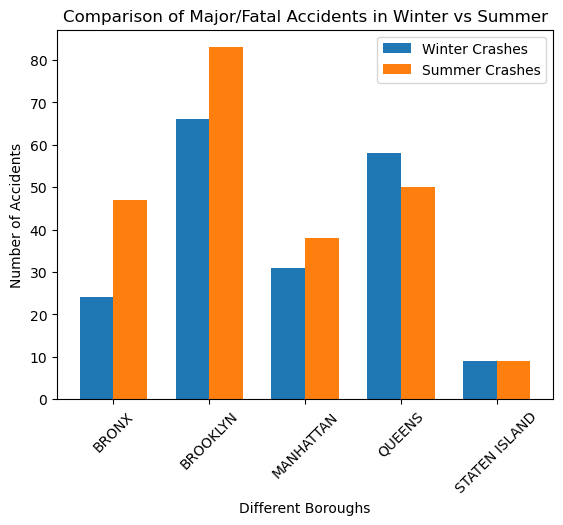

In [280]:
bar_width = 0.35

x1 = np.arange(len(borough_counts1))
x2 = [x + bar_width for x in x1]

fig, ax = plt.subplots()

ax.bar(x1, borough_counts1.values, width=bar_width, label='Winter Crashes')

ax.bar(x2, borough_counts2.values, width=bar_width, label='Summer Crashes')

ax.set_xlabel('Different Boroughs')
ax.set_ylabel('Number of Accidents')
ax.set_title('Comparison of Major/Fatal Accidents in Winter vs Summer')

ax.set_xticks(x1 + bar_width / 2)
ax.set_xticklabels(borough_counts1.index)

plt.xticks(rotation=45)

ax.legend()

plt.show()

# When we only view major/fatal accidents there is a much different result.
# Bronx , Brooklyn, Manhattan show to have substantially more accidents in the summer than Queens and Staten Island.
# Queens shows the inverse  - they have more accidents in the winter.
# Staten Island shows no difference in seasons.

In [281]:
# Possible solution:  
# Since there is a noticeable increase during the summer months we could look at more public awareness during heavier traffic times.
# Focus on reducing speed and possible road-rage to help reduce risk of accidents during summer months.
# Increased police, verify signage, lower speed limits during high traffic times of the year.